# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
import os

!git clone https://github.com/Kerbabyk/2024-Kondratenkov-TimeSeriesCourse.git

os.chdir('2024-Kondratenkov-TimeSeriesCourse/practice/05 Snippets')

print(os.getcwd())

Cloning into '2024-Kondratenkov-TimeSeriesCourse'...
remote: Enumerating objects: 734, done.
remote: Counting objects: 100% (351/351), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 734 (delta 244), reused 251 (delta 182), pack-reused 383 (from 1)
Receiving objects: 100% (734/734), 220.30 MiB | 9.98 MiB/s, done.
Resolving deltas: 100% (308/308), done.
Updating files: 100% (202/202), done.
/content/2024-Kondratenkov-TimeSeriesCourse/practice/05 Snippets


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 9.6 MB/s eta 0:00:00


Импорт библиотек и модулей

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

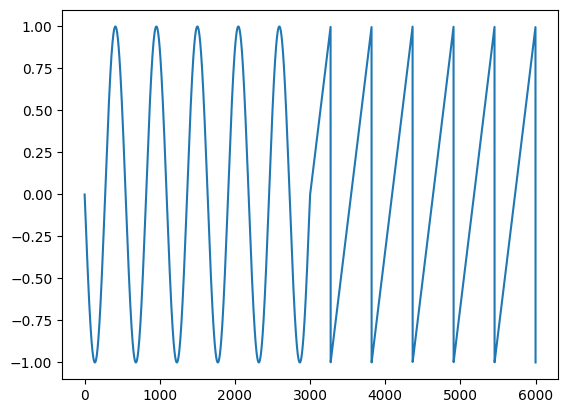

In [5]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [6]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


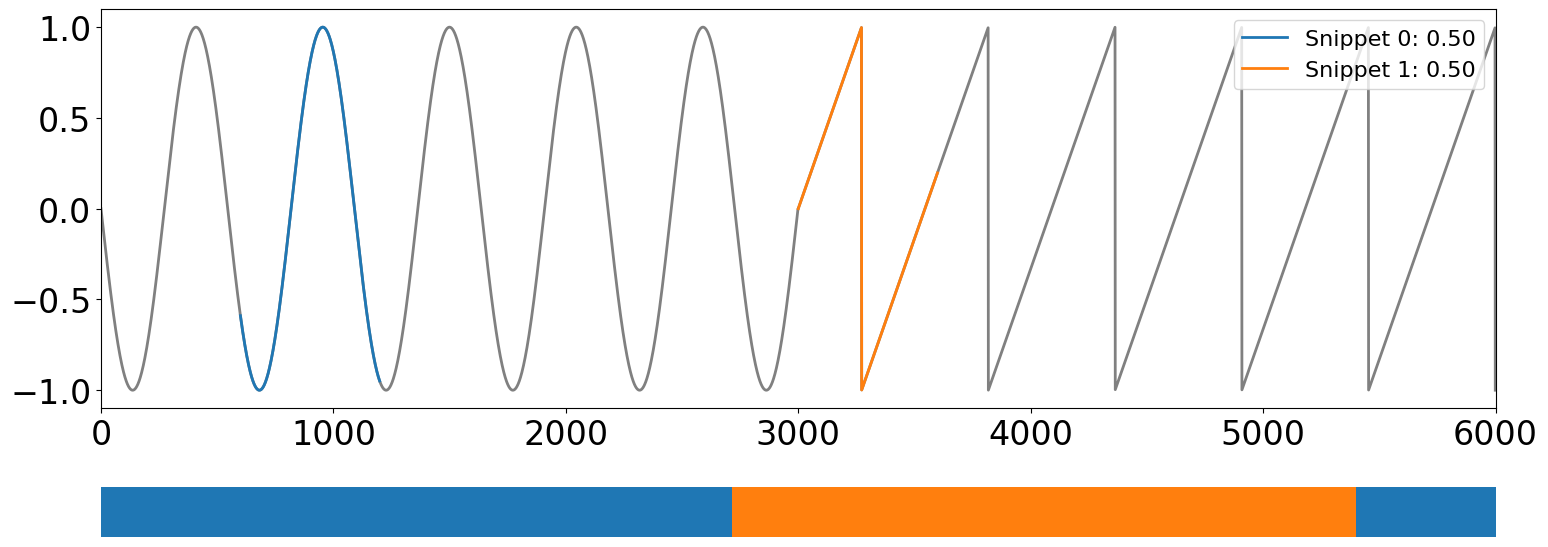

<Axes: >

In [7]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [8]:
# INSERT YOUR CODE

Количество строк в данных: 20
Количество столбцов в данных: 146000
Количество строк в выбранном интервале: 14
Первые несколько строк выбранных данных:
[[5.05710e+02 5.05720e+02 5.05730e+02 ... 2.30568e+03 2.30569e+03
  2.30570e+03]
 [2.00000e+00 2.00000e+00 2.00000e+00 ... 4.00000e+00 4.00000e+00
  4.00000e+00]
 [3.50625e+01 3.50625e+01 3.50625e+01 ... 3.56875e+01 3.56875e+01
  3.56875e+01]
 [4.97271e-01 6.93164e-01 9.29013e-01 ... 1.97893e+00 1.67759e+00
  1.21798e+00]
 [9.08249e+00 8.93258e+00 9.04638e+00 ... 6.11268e+00 5.73813e+00
  5.32511e+00]]
7


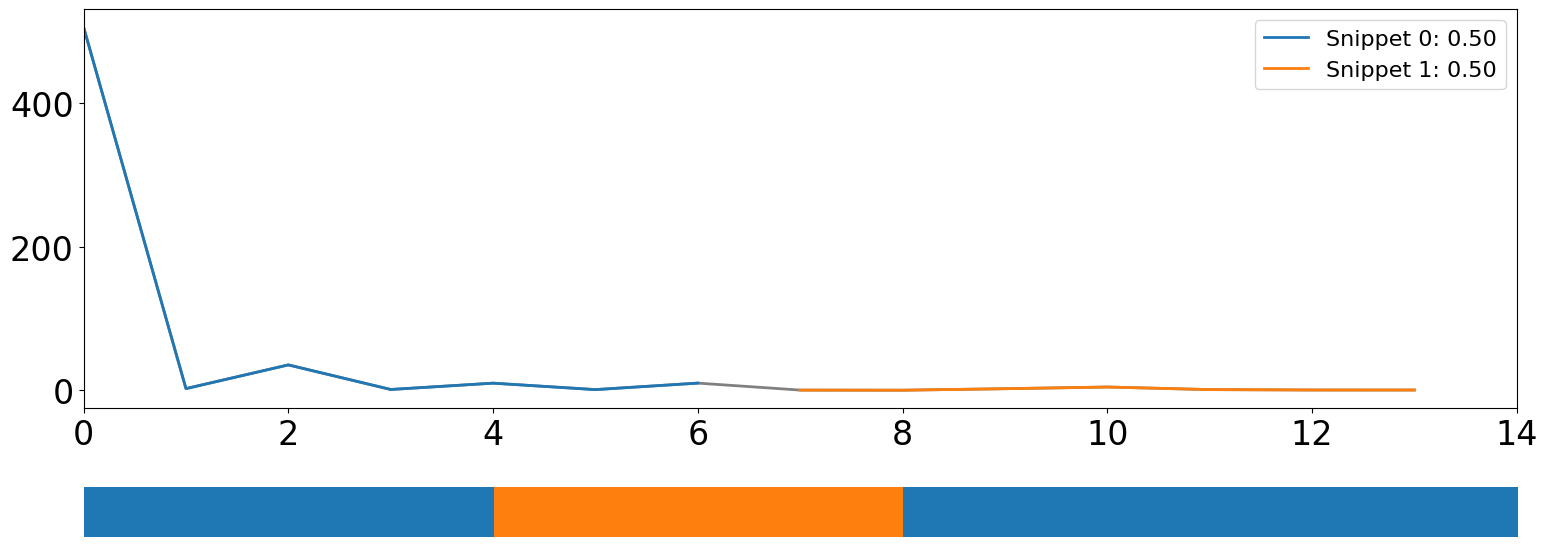

<Axes: >

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from stumpy import snippets
from modules.snippets import plot_snippets

# Загрузка данных из файла PAMAP.txt
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt', delimiter=' ')

# Вывод информации о данных
print(f"Количество строк в данных: {data.shape[0]}")
print(f"Количество столбцов в данных: {data.shape[1]}")

# Выбор временного интервала от 1790 сек. до 1930 сек.
selected_data = data[(data[:, 0] >= 0) & (data[:, 0] <= 1930)]

# Проверка, что выбранный временной интервал содержит данные
if len(selected_data) == 0:
    raise ValueError("Выбранный временной интервал не содержит данных. Убедитесь, что интервал правильный.")

# Вывод информации о выбранных данных
print(f"Количество строк в выбранном интервале: {selected_data.shape[0]}")
print(f"Первые несколько строк выбранных данных:\n{selected_data[:5, :]}")

# Выбор данных гироскопа на оси Y (столбец 11)
time_series = selected_data[:, 11]

# Проверка, что временной ряд не пустой
if len(time_series) == 0:
    raise ValueError("Временной ряд пустой. Убедитесь, что выбран правильный столбец данных.")

# Уменьшение длины сниппета до половины длины временного ряда
m = len(time_series) // 2
k = 2  # Количество сниппетов

# Поиск сниппетов
snp = snippets(time_series, m, k, percentage=0.5)

# Визуализация результатов
plot_snippets(time_series, snp)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

In [ ]:
# INSERT YOUR CODE

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [ ]:
# INSERT YOUR CODE

Количество строк в выбранном интервале: 14
Первые несколько строк выбранных данных:
[[5.05710e+02 5.05720e+02 5.05730e+02 ... 2.30568e+03 2.30569e+03
  2.30570e+03]
 [2.00000e+00 2.00000e+00 2.00000e+00 ... 4.00000e+00 4.00000e+00
  4.00000e+00]
 [3.50625e+01 3.50625e+01 3.50625e+01 ... 3.56875e+01 3.56875e+01
  3.56875e+01]
 [4.97271e-01 6.93164e-01 9.29013e-01 ... 1.97893e+00 1.67759e+00
  1.21798e+00]
 [9.08249e+00 8.93258e+00 9.04638e+00 ... 6.11268e+00 5.73813e+00
  5.32511e+00]]
7


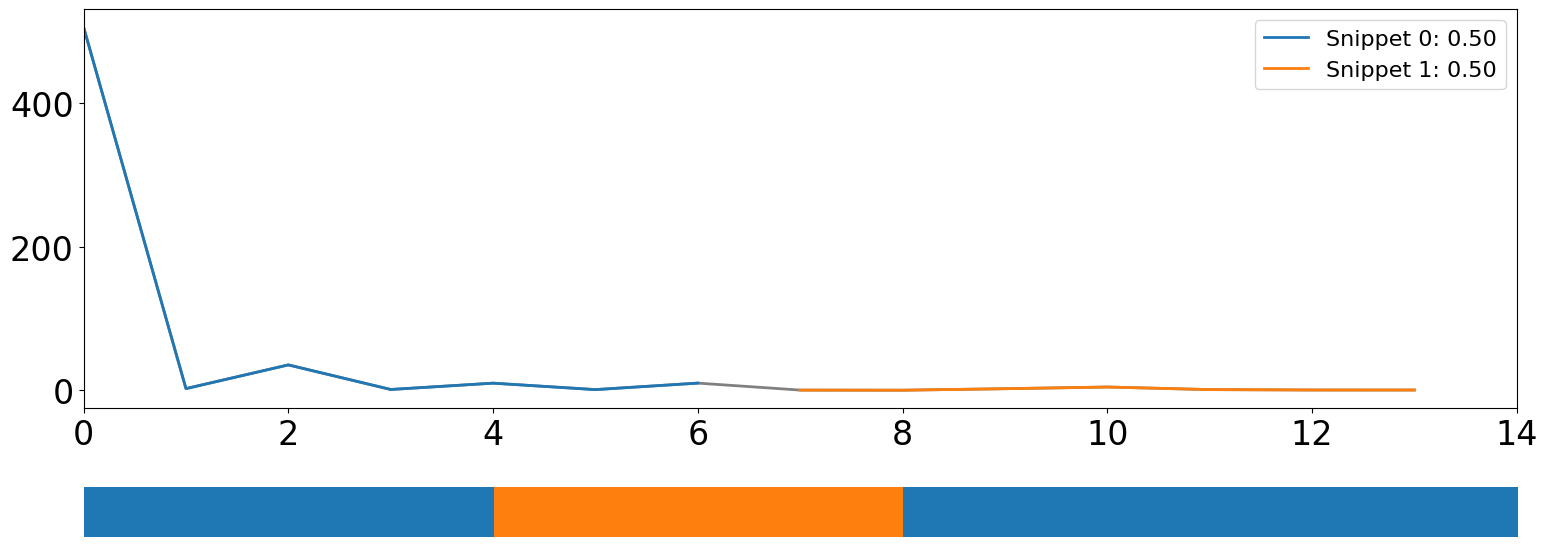

Intersection over Union (IoU): 1.0


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from stumpy import snippets
from modules.snippets import plot_snippets

# Загрузка данных из файла PAMAP.txt
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt', delimiter=' ')

# Выбор временного интервала от 1790 сек. до 1930 сек.
selected_data = data[(data[:, 0] >= 0) & (data[:, 0] <= 1930)]

# Проверка, что выбранный временной интервал содержит данные
if len(selected_data) == 0:
    raise ValueError("Выбранный временной интервал не содержит данных. Убедитесь, что интервал правильный.")

# Вывод информации о выбранных данных
print(f"Количество строк в выбранном интервале: {selected_data.shape[0]}")
print(f"Первые несколько строк выбранных данных:\n{selected_data[:5, :]}")

# Выбор данных гироскопа на оси Y (столбец 11)
time_series = selected_data[:, 11]

# Проверка, что временной ряд не пустой
if len(time_series) == 0:
    raise ValueError("Временной ряд пустой. Убедитесь, что выбран правильный столбец данных.")

# Уменьшение длины сниппета до половины длины временного ряда
m = len(time_series) // 2
k = 2  # Количество сниппетов

# Поиск сниппетов
snp = snippets(time_series, m, k, percentage=0.5)

# Визуализация результатов
plot_snippets(time_series, snp)

# Оценка точности разметки
# Предположим, что столбец 1 содержит идентификаторы активностей
true_labels = selected_data[:, 1]

# Предположим, что сниппеты соответствуют определенным активностям
# Для простоты предположим, что первый сниппет соответствует активности 1, а второй - активности 2
predicted_labels = np.zeros_like(true_labels)
snippet_indices = snp[1]
for i, snippet_start in enumerate(snippet_indices):
    snippet_end = snippet_start + m
    predicted_labels[snippet_start:snippet_end] = i + 1

# Расчет метрик точности
def calculate_iou(true_labels, predicted_labels):
    intersection = np.sum(np.logical_and(true_labels, predicted_labels))
    union = np.sum(np.logical_or(true_labels, predicted_labels))
    return intersection / union

iou = calculate_iou(true_labels, predicted_labels)

print(f"Intersection over Union (IoU): {iou}")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [ ]:
# INSERT YOUR CODE

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?